## 개요

+ **목적** : D2C 온라인 구매 현황 및 가설검정


+ **I .현황확인**
  + [x] 기간별 현황(주/일/요일/시간대)
  + [x] 지역 현황
  + [x] 체널 현황
  + [x] 제품별 현황
  

+ **II.가설 및 확인**
  + [ ] Q5 : 체널별로 차이가 나는 부분이 있는가?(ex. 주문 시간대, 제품 Category 등)
  + [ ] Q1 : EIS 3Level 기준, 판매추이
    + [ ] Q2-1 : HRM에 특이사항은?
    + [ ] Q2-2 : 셀랙스 특이사항은?
    + [ ] Q2-3 : Flavor기준 특이사항은?
    + [ ] Q2-4 : 코로나 여파로 특정 제품군이 수혜를 보았는가?
  + [ ] Q3 : 코로나 확진 추이와 온라인 매출간의 관계가 있는가?(& 얼마나 늘었는가?)
  + [ ] Q4 : 코로나 여파의 주요 외부 변수는?(네이버 검색 키워드, 관련 뉴스기사 껀 수, 인스타그램 게시글 수)
  + [ ] ~~Q5 : 재구매가 높은 제품군은?~~
  + [ ] Q6 : 같이 구매하는 제품 그룹은? / 그리고 그 비중은?



<img src="https://drive.google.com/open?id=1qh-GLPDgorFhIfZuWQdHvTXbvb4S6x8m" style="width: 400px; height:auto; float:left;">

In [1]:
# code 숨기기

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

# Display all cell outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
import cufflinks
from plotly.offline import iplot
cufflinks.go_offline()

from os import listdir

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)                               # 한글폰트 설정(전역)

In [42]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()
print('load complet')

load complet


### data read & format transfer

In [3]:
# 상품정보
PRODUCT = pd.read_excel('./200313_ecommerce_product.xlsx','PRODUCT')

In [4]:
# 외부정보 : 코로나바이러스 
COVID = pd.read_excel('./200313_COVID-19.xlsx', 'Sheet1')

COVID["확진일자"] = pd.to_datetime(COVID['확진일자'],format='%Y-%m-%d')
# COVID['월'] = COVID['확진일자'].dt.weekday
COVID['주차'] = COVID['확진일자'].dt.weekofyear
COVID["확진일자"] = COVID.확진일자.astype(str)

In [44]:
# 일별 주문정보

# 파일명 가져오기
directory_name = "./data"
file_names = listdir(directory_name)
file_names.remove('자료확보 기준.JPG')
# file_names[0].split('_')[0]

ORDER = pd.DataFrame()

# 전체 자료 불러오기 & 병합
for open_file in file_names:
    df_temp = pd.read_excel('./data/' + open_file,'Sheet1')
    ORDER = pd.concat([ORDER, df_temp], ignore_index=False)

ORDER['주문일시'] = pd.to_datetime(ORDER['주문일시'],format=None)
ORDER['주문주차'] = ORDER['주문일시'].dt.weekofyear
ORDER['주문시간'] = ORDER['주문일시'].dt.strftime('%H')
ORDER['주문요일'] = ORDER['주문일시'].dt.dayofweek
ORDER['PROVINCE'] =  ORDER['주소'].str.split(' ').str[0]
ORDER['CITY'] =  ORDER['주소'].str.split(' ').str[1]
# ORDER["YYYYMM"] = ORDER.YYYYMM.astype(object).astype(str)

In [45]:
ORDER['PROVINCE'] = ORDER['PROVINCE'].str[:3]

ORDER['PROVINCE']= ORDER['PROVINCE'].replace('Seo',  '서울특별시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('강원', '강원도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('경기', '경기도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('Gye',  '경기도')

ORDER['PROVINCE']= ORDER['PROVINCE'].replace('광주', '광주광역시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('대전', '대전광역시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('대구', '대구광역시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('부산', '부산광역시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('서울', '서울특별시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('울산', '울산광역시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('인천', '인천광역시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('제주', '제주특별시')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('세종', '세종특별시')

ORDER['PROVINCE']= ORDER['PROVINCE'].replace('경남', '경상남도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('경북', '경상북도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('전남', '전라남도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('전북', '전라북도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('충남', '충청남도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('충북', '충청북도')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('***',    '(자료없음)')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('nul',    '(자료없음)')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('(자료',  '(자료없음)')

In [7]:
# ORDER.count()

In [46]:
ORDER2 = ORDER.copy()
ORDER2 = ORDER2.replace({'PROVINCE': '세종'}, {'CITY': '세종시'})

In [47]:
# 세종시는 세부 없음(주소1 = 주소2)
# ORDER.loc[(ORDER.PROVINCE == '세종'),'CITY']='세종시'

# 인천 미추홀구 -> 남구
ORDER['CITY']= ORDER['CITY'].replace('미추홀구', '남구')

In [48]:
# print(list(ORDER.columns))

In [49]:
# 필요한 항목만 선택
ORDER= ORDER[['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량', 
              '우편번호', 'PROVINCE', 'CITY', '배송완료', '주문주차', '주문시간', '주문요일',]]

In [12]:
# ORDER.rename(columns = {'주문번호(쇼핑몰)' : '주문번호'}, inplace = True)

In [50]:
#주소2 정보는 기존 표준화 내용 사용
ADDR = pd.read_excel('./data_GIS_v2.xlsx', 'sheet1')

In [51]:
# ADDR.head()

In [52]:
ADDR.rename(columns = {'광역시도' : 'PROVINCE', '행정구역' : 'CITY',}, inplace = True)

In [53]:
ORDER = pd.merge(ORDER, ADDR, on =['PROVINCE', 'CITY'], how='left')

In [54]:
ORDER = pd.merge(ORDER, PRODUCT, on ='상품명', how='left')

In [55]:
# ORDER.head(1).T

In [19]:
# ORDER.tail(1)

In [0]:
# 제품정보 확인/다운로드

# item_all = ORDER.groupby(['거래처명', '상품명'])['주문일시'].count()

# writer = pd.ExcelWriter('item.xlsx')
# item_all.to_excel(writer, 'sheet1')
# writer.save()

### 자료현황

In [0]:
print('<제품분류 자료 현황>')
print('- 자료 : PRODUCT')
print('- 설명 : 각 체널에서 판매되는 제품명에 대해, EIS 3 Level 기준으로 매칭함')
print('- 겟수 : {:,} 껀'.format( int(PRODUCT.상품명.count()) ) )
print('- 기간 : 해당 없음')
# print('- 주문 인원 : {:,} 명 (핸드폰 번호 기준)'.format( ORDER.groupby('핸드폰번호')['주문일자'].nunique().count() ))
print('')
print('<자료 예시>')
PRODUCT.head(3)


<제품분류 자료 현황>
- 자료 : PRODUCT
- 설명 : 각 체널에서 판매되는 제품명에 대해, EIS 3 Level 기준으로 매칭함
- 겟수 : 1,876 껀
- 기간 : 해당 없음

<자료 예시>


,상품명,EIS1lv,EIS2lv,EIS3lv,맛,취급체널
0,[2020 설] 상하목장 슬로우키친 150g x 9팩 (양송이크림스프3팩+클램차우더...,HMR,스프,스프,NaN,스마트스토어
1,[AllPRIME 전용] [매일유업] 상하목장 슬로우키친 스프 6봉 양송이 클램차우...,HMR,스프,스프,NaN,11번가
2,"[AllPRIME 전용] [매일유업] 상하목장 슬로우키친 스프 9팩 (양송이, 클램...",HMR,스프,스프,NaN,11번가


In [0]:
print('<코로나 현황 자료 현황>')
print('- 자료 : COVID')
print('- 설명 : 일별 지역별 코로나바이러스 확진자 정보 수집(단, 대구/경북은 수집 제외됨)')
print('- 겟수 : {:,} 껀'.format( int(COVID.확진일자.count()) ) )
print('- 기간   : {} ~ {} '.format( COVID.확진일자.min(), COVID.확진일자.max()))
# print('- 주문 인원 : {:,} 명 (핸드폰 번호 기준)'.format( ORDER.groupby('핸드폰번호')['주문일자'].nunique().count() ))
print()
print('<코로나 현황 자료 : 예시>')
COVID.head(3)


<코로나 현황 자료 현황>
- 자료 : COVID
- 설명 : 일별 지역별 코로나바이러스 확진자 정보 수집(단, 대구/경북은 수집 제외됨)
- 겟수 : 1,203 껀
- 기간   : 2020-01-20 ~ 2020-03-19 

<코로나 현황 자료 : 예시>


,지역1,지역2,확진일자,성별,연령,연령대,주차
0,인천,NaN,2020-01-20,여,35.0,30대,4
1,서울,강서구,2020-01-23,남,56.0,50대,4
2,경기,고양시,2020-01-26,남,54.0,50대,4


In [0]:
print('<사방넷 주문자료>')
print('- 자료 : ORDER')
print('- 설명 : 사방넷을 통해, 온라인체널 별로 수집된 주문 정보 내용 중 일부(기준 :배송완료 일자 기준)')
print('- 건수 : {:,} 껀'.format( (ORDER.주문일자.count()) ) )
print('- 기간 : {} ~ {} '.format( ORDER.주문일자.min(), ORDER.주문일자.max()))
# print('- 주문 인원 : {:,} 명 (핸드폰 번호 기준)'.format( ORDER.groupby('핸드폰번호')['주문일자'].nunique().count() ))
ORDER.head(2).T
# print('')

<사방넷 주문자료>
- 자료 : ORDER
- 설명 : 사방넷을 통해, 온라인체널 별로 수집된 주문 정보 내용 중 일부(기준 :배송완료 일자 기준)
- 건수 : 664,890 껀
- 기간 : 2020-01-15 ~ 2020-03-23 


,0,1
거래처명,11번가,11번가
주문일자,2020-01-19,2020-01-20
주문일시,2020-01-19 00:00:00,2020-01-20 00:00:00
주문번호(쇼핑몰),202001191796181,202001202672598
상품코드(쇼핑몰),2540466186,2407241730
상품명,[매일유업] 멸균 우유 오리지널 200ml 24팩,[매일유업] 상하목장 유기농 우유 바나나 125ml 24팩
결제금액,12900,16900
수량,1,1
우편번호,010-60,011-57
PROVINCE,서울,서울


In [0]:
# ORDER.count()

## I. 현황확인

### 1.기간별 현황(주/일/요일/시간대)

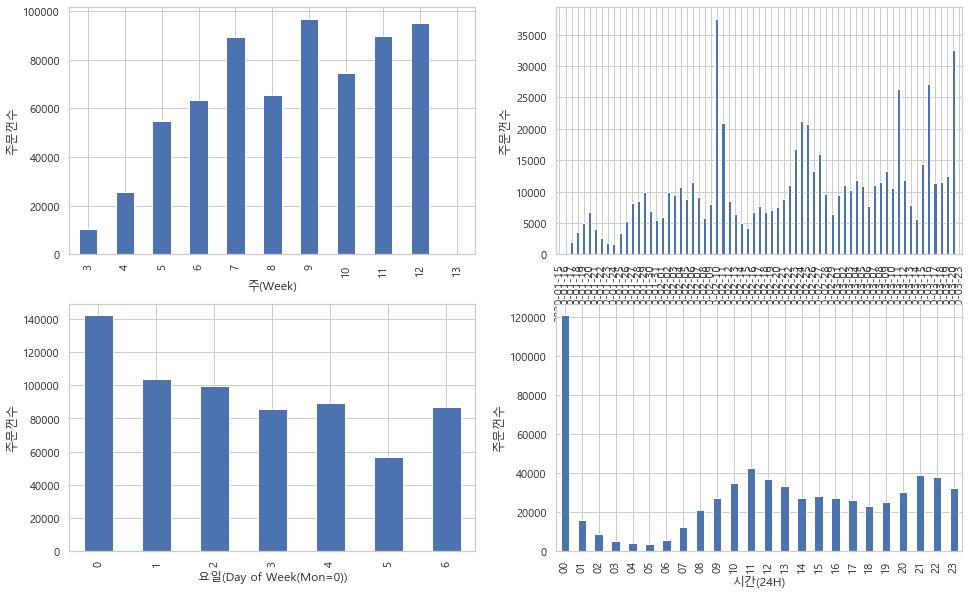

In [0]:
mpl.rc('figure', figsize=(16, 10))

# 주
ax = plt.subplot(2,2,1)
ORDER.groupby('주문주차').count()['주문일자'].plot.bar(ax = ax)
plt.xticks(rotation=90)
plt.xlabel('주(Week)')
plt.ylabel('주문껀수')

# 일
ax = plt.subplot(2,2,2)
ORDER.groupby('주문일자').count()['주문요일'].plot.bar(ax = ax)
plt.xticks(rotation=90)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

# 요일
ax = plt.subplot(2,2,3)
ORDER.groupby('주문요일').count()['주문일자'].plot.bar(ax = ax)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=90)
plt.xlabel('요일(Day of Week(Mon=0))')
plt.ylabel('주문껀수')

# 시간
ax = plt.subplot(2,2,4)
ORDER.groupby('주문시간').count()['주문일자'].plot.bar(ax = ax)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=90)
plt.xlabel('시간(24H)')
plt.ylabel('주문껀수')

plt.show()

<확인 사항>
+ 발송완료 기준으로 자료가 수집되면서, 3주차(1/15~1/19) 자료가 일부 추가됨
+ 시간별 현황의 경우, 0시 수집값이 많아, 별도 확인이 필요함  
  $\to$ 시간 정보가 수집되지 않아, 0시로 적용된 Case로 확인됨

### 2.체널 현황

In [0]:
print('<대상 체널 : {}개 >'.format( len(list(ORDER.거래처명.unique())) ) )
list(ORDER.거래처명.unique())

<대상 체널 : 8개 >


['11번가', '스마트스토어', '쿠팡', '이마트(신)', '카카오톡스토어', '위메프(신)', '정원e샵(신)', 'Grip']

In [0]:
channel = (pd.DataFrame(ORDER.groupby('거래처명').count()['주문일자']).reset_index())
channel = channel.sort_values('주문일자', ascending=False)

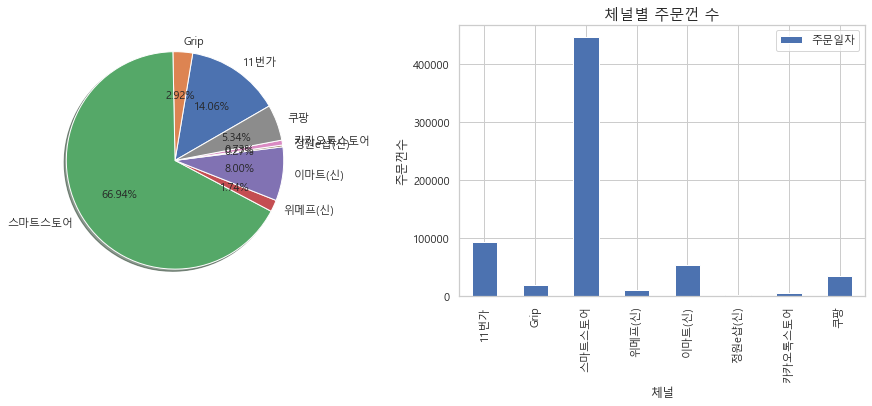

In [0]:
mpl.rc('figure', figsize=(16, 5))

# 전체비율
ax = plt.subplot(1,2,1)
plt.pie((pd.DataFrame(ORDER.groupby('거래처명').count()['주문일자']).reset_index())['주문일자'], 
        labels=(pd.DataFrame(ORDER.groupby('거래처명').count()['주문일자']).reset_index())['거래처명'], 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=30,
        textprops={'fontsize': 11}) # text font size
# plt.axis('equal') #  equal length of X and Y axis
# plt.title('Pie Chart of Market Share', fontsize=20)

ax = plt.subplot(1,2,2)
pd.DataFrame(ORDER.groupby('거래처명').count()['주문일자']).plot.bar(ax = ax)
# ORDER.groupby('거래처명').count()['주문일자'].sort_values(ascending=False).plot.bar(ax = ax)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=90)
plt.title('체널별 주문껀 수',fontsize=15)
plt.xlabel('체널')
plt.ylabel('주문껀수')

plt.show()

<확인 사항>
+ 스마트스토어가 주문껀수 기준 2/3을 차지함.
+ 스마트스토어/쿠팡/11번가/이마트까지가 상위 position이며, 해당 체널아 약 95%를 점유하고 있음.

### 3.지역 현황

In [0]:
GIS = ORDER.groupby(['PROVINCE', 'CITY', 'shortName', 'x', 'y'])['주문일시'].count().reset_index()
GIS.rename(columns = {'주문일시' : '주문횟수',}, inplace = True)

In [0]:
GIS.head(1)

,PROVINCE,CITY,shortName,x,y,주문횟수
0,강원,강릉시,강릉,11.0,4.0,2408


In [0]:
# drawKorea('주문횟수', GIS, 'PROVINCE', 'CITY', 'Blues')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



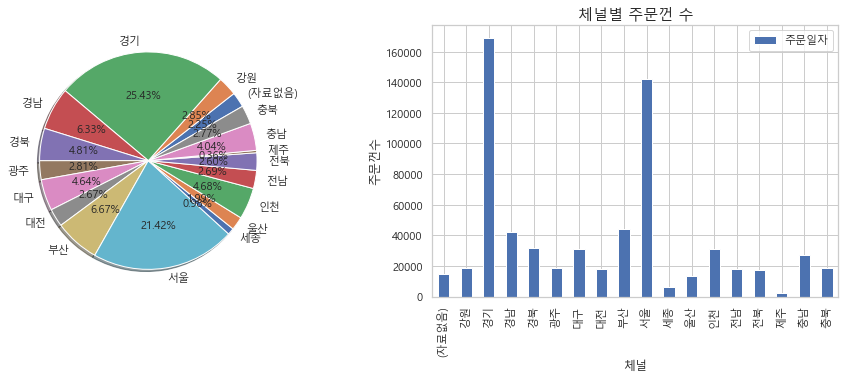

In [0]:
mpl.rc('figure', figsize=(16, 5))

# 전체비율
ax = plt.subplot(1,2,1)
ax = plt.subplot(1,2,1)
plt.pie((pd.DataFrame(ORDER.groupby('PROVINCE').count()['주문일자']).reset_index())['주문일자'], 
        labels=(pd.DataFrame(ORDER.groupby('PROVINCE').count()['주문일자']).reset_index())['PROVINCE'], 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=30,
        textprops={'fontsize': 11}) # text font size
# plt.axis('equal') #  equal length of X and Y axis
# plt.title('Pie Chart of Market Share', fontsize=20)

ax = plt.subplot(1,2,2)
pd.DataFrame(ORDER.groupby('PROVINCE').count()['주문일자']).plot.bar(ax = ax)
# ORDER.groupby('거래처명').count()['주문일자'].sort_values(ascending=False).plot.bar(ax = ax)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=90)
plt.title('체널별 주문껀 수',fontsize=15)
plt.xlabel('체널')
plt.ylabel('주문껀수')

plt.show()

### 4.제품그룹 현황

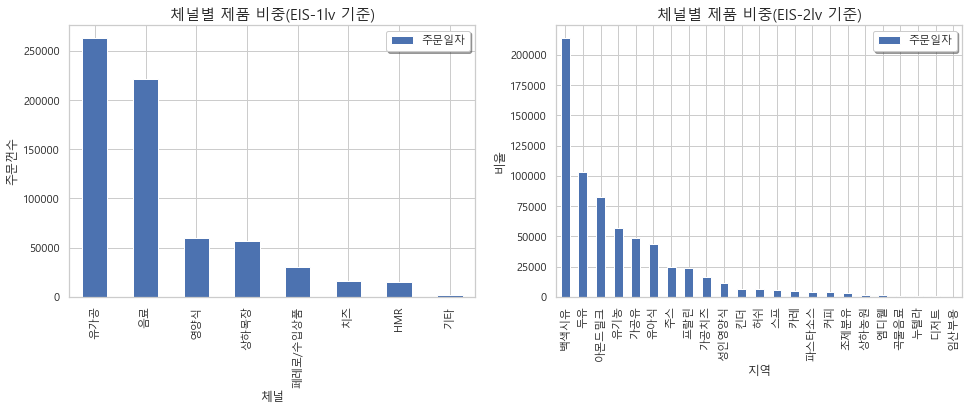

In [0]:
mpl.rc('figure', figsize=(16, 5))

# 전체비율
ax = plt.subplot(1,2,1)
ORDER.groupby('EIS1lv').count()['주문일자'].sort_values(ascending=False).plot.bar(ax = ax)
# ORDER.groupby('거래처명').count()['주문일자'].sort_values(ascending=False).plot.bar(ax = ax)
plt.legend(loc='best',fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=90)
plt.title('체널별 제품 비중(EIS-1lv 기준)',fontsize=15)
plt.xlabel('체널')
plt.ylabel('주문껀수')

# EIS 1lv + 2lv
ax = plt.subplot(1,2,2)
ORDER.groupby('EIS2lv').count()['주문일자'].sort_values(ascending=False).plot.bar(ax = ax)
plt.legend(loc='best',fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=90)
plt.title('체널별 제품 비중(EIS-2lv 기준)',fontsize=15)
plt.xlabel('지역')
plt.ylabel('주문껀수')

plt.show()

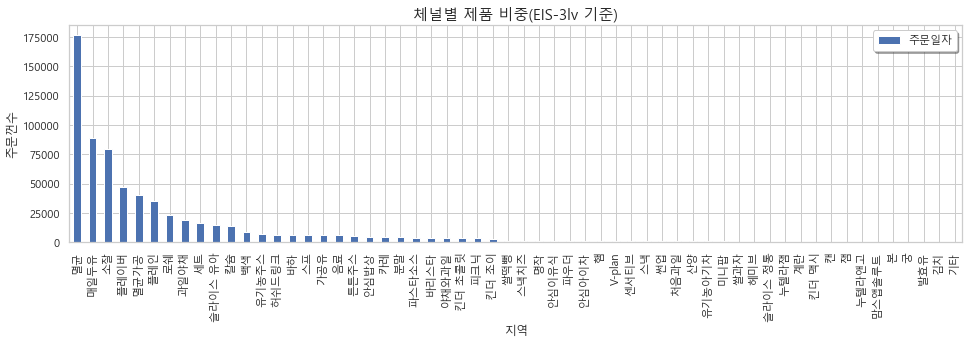

In [0]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,(1,2))
ORDER.groupby('EIS3lv').count()['주문일자'].sort_values(ascending=False).plot.bar(ax = ax)
plt.legend(loc='best',fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=90)
plt.title('체널별 제품 비중(EIS-3lv 기준)',fontsize=15)
plt.xlabel('지역')
plt.ylabel('주문껀수')

plt.show()

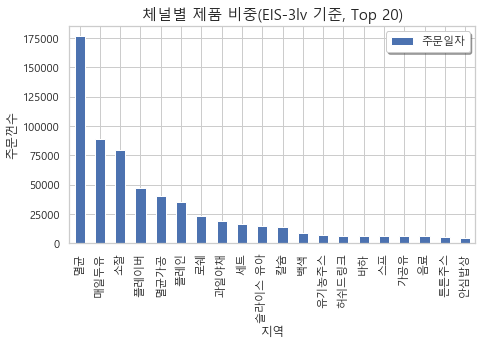

In [0]:
mpl.rc('figure', figsize=(16, 4))
ax = plt.subplot(1,2,1)
ORDER.groupby('EIS3lv').count()['주문일자'].sort_values(ascending=False)[:20].plot.bar(ax = ax)
plt.legend(loc='best',fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=90)
plt.title('체널별 제품 비중(EIS-3lv 기준, Top 20)',fontsize=15)
plt.xlabel('지역')
plt.ylabel('주문껀수')
plt.show()

In [21]:
ORDER.columns

Index(['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량',
       '우편번호', 'PROVINCE', 'CITY', '배송완료', '주문주차', '주문시간', '주문요일', 'shortName',
       'x', 'y', 'EIS1lv', 'EIS2lv', 'EIS3lv', '맛', '취급체널', '음용연령'],
      dtype='object')

In [56]:
GIS = ORDER[ORDER['EIS2lv'] == '조제분유'].groupby(['PROVINCE', 'CITY', 'shortName', 'x', 'y'])['주문일시'].count().reset_index()
GIS.rename(columns = {'주문일시' : '주문횟수',}, inplace = True)

In [59]:
GIS.tail()

,PROVINCE,CITY,shortName,x,y,주문횟수
155,충청북도,음성군,음성,5.0,10.0,2
156,충청북도,제천시,제천,8.0,10.0,18
157,충청북도,증평군,증평,6.0,11.0,2
158,충청북도,진천군,진천,5.0,11.0,6
159,충청북도,청주시,청주,6.0,12.0,31


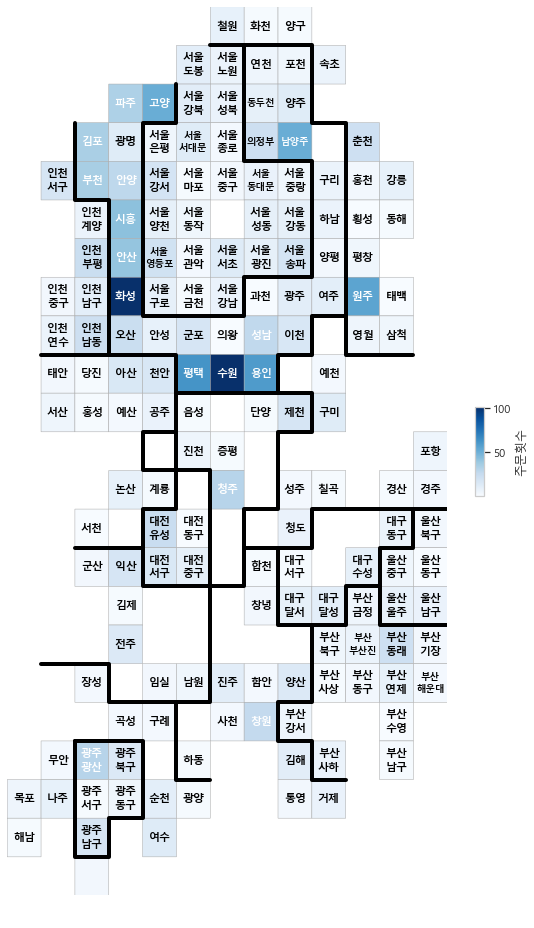

In [58]:
drawKorea('주문횟수', GIS, 'PROVINCE', 'CITY', 'Blues')